In [5]:
import pinn
import tensorflow as tf
from ase import units
from ase.io import read
from ase.io.trajectory import Trajectory
from ase.md import MDLogger
from ase.calculators.mixing import AverageCalculator
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.nptberendsen import NPTBerendsen
from ase.md.nvtberendsen import NVTBerendsen
from glob import glob

setup = {
  'ensemble': 'npt', # ensemble
  'T': 340, # temperature in K
  't': 1, # time in ps
  'dt': 0.5, # timestep is fs
  'taut': 100, # thermostat damping in steps
  'taup': 1000, # barastat dampling in steps
  'log-every': 2, # log interval in steps
  'pressure': 1, # pressure in bar
  'compressibility': 4.57e-4 # compressibility in bar^{-1}
}

In [ ]:
ensemble=setup['ensemble']
T=float(setup['T'])
t=float(setup['t'])*units.fs*1e3
dt=float(setup['dt'])*units.fs
taut=int(setup['taut'])
taup=int(setup['taup'])
every=int(setup['log-every'])
pressure=float(setup['pressure'])
compressibility=float(setup['compressibility'])

# calc = pinn.get_calc()
models = glob('/cephyr/users/yunqi/Alvis/pt_pils/models/pils-v5-filtered-pinet-ekf-v3-pre-*/model')
calcs = [pinn.get_calc(model) for model in models]
calc = AverageCalculator(calcs)
atoms = read("../skel/init/hoac-c1im-a32b32i0-rho1.0753.xyz")
atoms.set_calculator(calc)
MaxwellBoltzmannDistribution(atoms, T*units.kB)

if ensemble == 'npt':
    dyn = NPTBerendsen(atoms, timestep=dt, temperature=T, pressure=pressure,
                  taut=dt * taut, taup=dt * taup, compressibility=compressibility)
if ensemble == 'nvt':
    dyn = NVTBerendsen(atoms, timestep=dt, temperature=T, taut=dt * taut)

dyn.attach(
    MDLogger(dyn, atoms, 'asemd.log',stress=True, mode="w"),
    interval=int(every))
dyn.attach(
    Trajectory('asemd.traj', 'w', atoms).write,
    interval=int(every))
dyn.run(int(t/dt))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/cephyr/users/yunqi/Alvis/pt_pils/models/pils-v5-filtered-pinet-ekf-v3-pre-3/model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow

/cephyr/users/yunqi/Alvis/.local/lib/python3.8/site-packages/ase/md/md.py:48: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))
/cephyr/users/yunqi/Alvis/.local/lib/python3.8/site-packages/ase/md/nptberendsen.py:212: FutureWarning: The 'pressure' parameter is deprecated, please specify the pressure in atomic units (eV/Å^3) using the 'pressure_au' parameter.
  warnings.warn(FutureWarning(w))
/cephyr/users/yunqi/Alvis/.local/lib/python3.8/site-packages/ase/md/nptberendsen.py:96: FutureWarning: Specify the compressibility in atomic units.
  warnings.warn(FutureWarning(


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /cephyr/users/yunqi/Alvis/pt_pils/models/pils-v5-filtered-pinet-ekf-v3-pre-3/model/model.ckpt-500000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /cephyr/users/yunqi/Alvis/pt_pils/models/pils-v5-filtered-pinet-ekf-v3-pre-2/model/model.ckpt-500000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /cephyr/users/yunqi/Alvis/pt_pils/models/pils-v5-filtered-pinet-ekf-v3-p

In [10]:
from ase.io import read,write
traj = read('asemd.traj', index=':')
write('tmp.xyz', traj)

In [11]:
density = [atoms.get_masses().sum() / 6.022e23 / atoms.get_volume() * 1e30 /1e6 for atoms in traj]

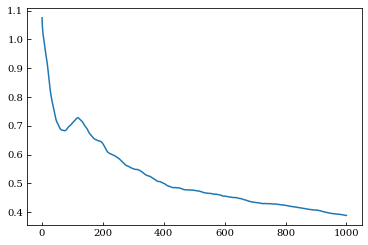

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(density)

In [20]:
from ase.io import read, write

traj = read('../trajs/ase/pils-v5-filtered-pinet-adam-v2-pre-hoac-c1im-a0b0i32-rho1.0753/asemd.traj', index=':')
write('adam-i32-r1.0-1ps.xyz', traj)

traj = read('../trajs/ase/pils-v5-filtered-pinet-ekf-v3-pre-hoac-c1im-a0b0i32-rho1.0753/asemd.traj', index=':')
write('ekf-i32-r1.0-1ps.xyz', traj)

In [12]:
from piview import piview

atoms = traj[-1].copy()
atoms.pbc = False
view = piview(atoms, draw_bonds=True,
              width=250, height=250,
              bond_cutoff=1.2)
display(view)